<H1> Group 22: Project title <H1>

**Introduction**


We have all seen the rise in number of forest fires in the past few years and scinetists and climate activists alike all over the world have raised their concerns regarding the same. While natural in few ecosystems, these recent forest fires root their cause to the global rise in temperature and poor land management by authorities. Due to this no matter whether a wildfire's origin is due to human intervention or natural, the drier climate makes it easy for it to spread over a region quite intensely. 
<br>
These fires are clear indicators that for change because not only do they sometimes do irreparable damge to forest ecosystems but also the gases released due to these fires travel to the city causing health crises. While governments all over the world introduce initiatives to promote sustatinable practices and the general public abides by them, it is also important for scienitsts to know which forests are prone to fires. Through this project we intend to answer the question **_"Whether there will be a forest-fire or not, given certain predictors."_**<br>


To help answer this question, we make use of the Algerian Forest Fire Data Set which has 244 observations of 13 attributes and 1 output attribute, which in this case tells us whether there was a fire or not. <br>

**Methods**


The question we seek to answer falls under the **classification** category and in order to answer it, we have divided our dataset into a training set and a testing set. With the training set, we will create our _K-nearest classifier_ and use the DMC, BUI, DC as predictors. This classifier will then be used to predict the class labels of our test set and thereby determining the accuracy of it. <br>
We chose these predictors specifically because while fire behavior is influenced by weather, the combustibility of forest fuel and fuel type play an important role as well which are represented by them. Lastly, we have used the ggpairs() function to build a scatterplot matrix which shows us pairwise plots using all columns of the dataset.

**Expected Outcomes and Significance**


Through this project, we expect to find whether the following predictors **Duff Moisture Code (DMC), Drought Code (DC), Build Up Index (BUI)** can help us understand that  <br>_if we know the values of these predictors, whether a fire will occur or not_. <br>
Since these predictor values are dependent on variables like  temperature, rain humidity and wind speed, which are calculated (for each day) and predicted (for upcoming days) by scientists, our classifier can help predict whether a certain region is prone to wildfires or not.  <br>
As we, humans, fail to take actions against what causes these forest fires to happen so frequently, we need indicators which can help assist authorities in tackling this man-made disaster. Most importantly, this can help firefighters understand whether there is a possibility of a forest fire passing onto a different region (given region's predictors) and strategise accordingly.<br>
One important question after proecessing the entire data above would be whether there are more factors we can consider which can help understand nature of fires better or do we go on building better models with the given predictors.



<H4> Data set used: </H4>
Algerian forest fires: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv <br>
This data set has 14 variables, thirteen of which are numerical and one is categorical.

<H2> Loading the data set into R and wrangling it </H2>

In [ ]:
install.packages("skimr")
install.packages("GGally")
library(tidyverse)
library(repr)
library(GGally)
library(tidymodels)
library(skimr)

In [ ]:
# URL that contains the dataframe that we want to examine
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Reading dataframe into R
algerian_forest_fires <- read_csv(url,skip = 1)

# Examining the data frame
# algerian_forest_data

# Inspecting the parsing failures

# algerian_forest_fires[123, 1:14] -- Empty row between two data sets

# algerian_forest_fires[168, 1:14] -- Needs to be fixed

algerian_forest_fires[168, 10] = '14.6'
algerian_forest_fires[168, 11] =  '9'
algerian_forest_fires[168, 12] =  '12.5'
algerian_forest_fires[168, 13] =  '10.4'
algerian_forest_fires[168, 14] =  "fire"

<H3> After a quick examination we can see that:</H3>
    <li> File that we read contains 2 dataframes.</li>
    <li> The collumn types of the data set are not parsed correctly.</li>
<p> To extract the target data frame, we would need to split the file into 2 dataframes that it contains, tidy each dataframe and join them </p>

<H4>Extracting and tidying Bejaja region data set</H4>

In [90]:
# Retrieving the bejaja data set
bejaja_forest <- slice(algerian_forest_fires, 2:122)

#Fixing the collumn types of the numerical variables
bejaja_forest_data <- bejaja_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double) 

# Selecting the observation class data
bejaja_forest_fires <- bejaja_forest %>% 
    select(Classes) 

# Joining numerical variable and observation class data 
bejaja_forest_tidy <- cbind(bejaja_forest_data,bejaja_forest_fires)
#head(bejaja_forest_tidy)

<H4>Extracting and tidying Sidi-Bel region data set</H4>

In [91]:
#Finding the number of rows in the original dataset
number_of_rows <- nrow(algerian_forest_fires)

# Retrieving the bejaja data set
sidi_bel_forest <- slice(algerian_forest_fires, 125:number_of_rows)

gsub_convert <- function(x) {
    as.double(gsub(",",".",x))
}
#Fixing the collumn types of the numerical variables
sidi_bel_forest_data <- sidi_bel_forest %>% 
    select(day:FWI) %>% 
    map_df(gsub_convert)


# Selecting the observation class data
sidi_bel_forest_fires <- sidi_bel_forest %>% 
    select(Classes)

# Joining numerical variable and observation class data 
sidi_bel_forest_tidy <- cbind(sidi_bel_forest_data,sidi_bel_forest_fires)

<H4>Joining our two new dataframes</H4> 

In [92]:
algerian_forest_fires_tidy <- full_join(bejaja_forest_tidy, sidi_bel_forest_tidy)
#algerian_forest_fires_tidy

# The resulting data frame is tidy and ready for the further analysis

Joining, by = c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes")



In [98]:
# Setting a seed 
set.seed(2021)
# Splitting the data set
algerian_forest_fires_tidy <- mutate(algerian_forest_fires_tidy, Classes = as.factor(Classes))
forest_split <- initial_split(algerian_forest_fires_tidy, prop = 0.75, strata = Classes)
forest_train <- training(forest_split)
forest_test <- testing(forest_split)

# Specifying the summary function
my_skim <- skim_with(numeric = sfl(median, mean,  sd, min, max),
                                   append = FALSE)

# Creating summary table
summary_df <- my_skim(forest_train) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)
summary_df

skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.median,numeric.mean,numeric.sd,numeric.min,numeric.max
<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Classes,0,1,FALSE,2,"fir: 104, not: 79",NA,NA,NA,NA,NA
day,0,1,NA,NA,NA,16.0,16.2622951,8.723283,1.0,31.0
month,0,1,NA,NA,NA,8.0,7.5519126,1.122343,6.0,9.0
year,0,1,NA,NA,NA,2012.0,2012.0000000,0.000000,2012.0,2012.0
Temperature,0,1,NA,NA,NA,32.0,31.9125683,3.558461,22.0,42.0
RH,0,1,NA,NA,NA,64.0,62.4153005,14.480081,24.0,89.0
Ws,0,1,NA,NA,NA,15.0,15.4699454,2.751208,6.0,26.0
Rain,0,1,NA,NA,NA,0.0,0.7868852,1.965567,0.0,16.8
FFMC,0,1,NA,NA,NA,83.8,77.7551913,14.384399,28.6,96.0


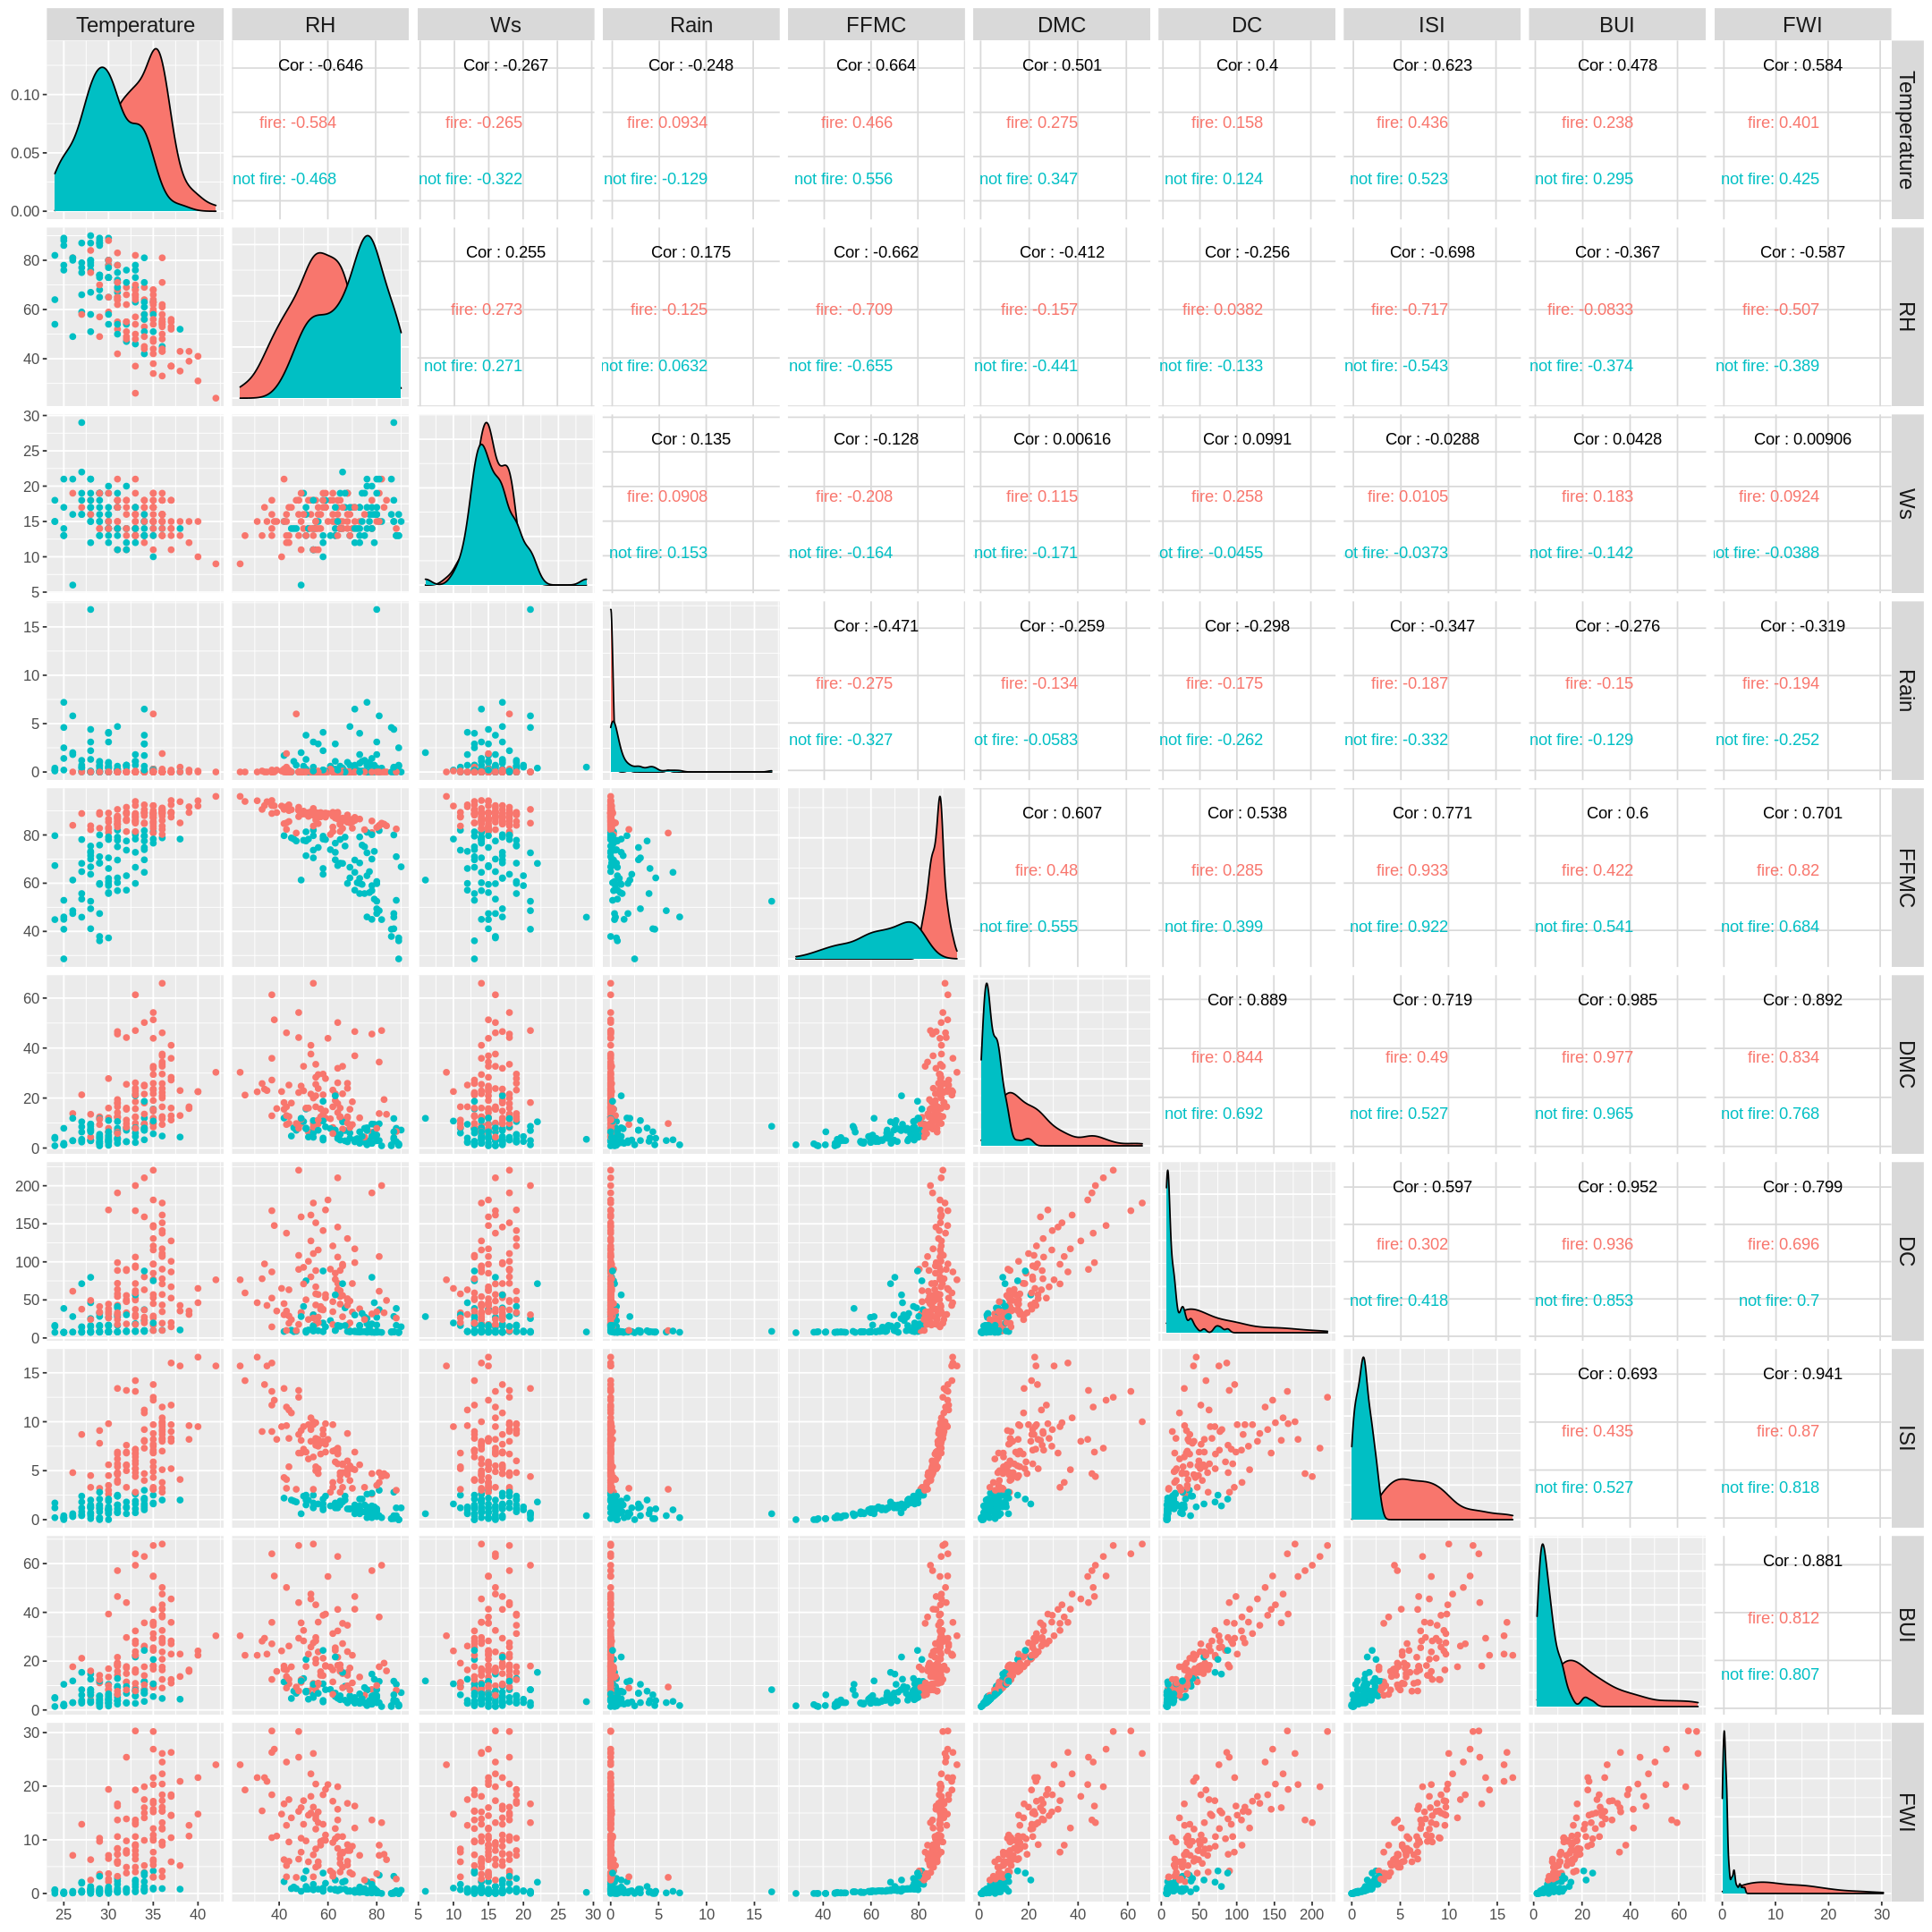

In [94]:
# Plot options
options(repr.plot.width = 18, repr.plot.height= 18)
# Removing the date data
forest_train <- select(forest_train,Temperature:Classes)
num_data <- select(forest_train,Temperature:FWI)
ggpairs(forest_train, columns = c("Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"),
        aes(colour = Classes))  +
        theme(text = element_text(size = 18),
              axis.text = element_text(size = 10))
